# Prolog

In [8]:
import pandas as pd
import seaborn as sb
import OHCParser as op
from matplotlib.ticker import FormatStrFormatter

## Read and Derive Auxiliary Data

In [9]:
dfs = op.read_submissions()
dfs = op.derive_metrics(dfs)

df_pre = dfs
# convert non-numeric values to NaNs
df_pre["Pre-Processing Wall-Clock Time [s]"] = pd.to_numeric(
    df_pre["Pre-Processing Wall-Clock Time [s]"], errors="coerce"
    )
# ditch NaNs and zero values
df_pre = df_pre[~df_pre["Pre-Processing Wall-Clock Time [s]"].isnull()]
df_pre = df_pre[df_pre["Pre-Processing Wall-Clock Time [s]"] != 0]
df_pre["Pre-Processing Wall-Clock Time [h]"] = df_pre["Pre-Processing Wall-Clock Time [s]"] / 3600

fig_folder = "figures_coherentIO"
doSaveFig = False

last time the data was updated 2025-09-05 13:41:12.977305  by  sles
03_OHC1_DrivAer_Result_Template_v3 Ruggero Poletto.xlsm: No energy data found


/home/sles/.venvs/py3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/sles/.venvs/py3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


10_Olenik_OHC1_FTP_S_MILAN250_CPU.xlsm: No energy data found
08_OHC1_DrivAer_Result_inductiva_65M Gabriel Marcos Magalhães.xlsm: No energy data found
05_Huawei_OHC1_DrivAer_Result_Software_MxP_Fine.xlsm: number of timestep != number of wall clock time, assuming partial run
05_Huawei_OHC1_DrivAer_Result_Software_MxP_Fine.xlsm: trying to fill wct, this makes only sense if N/A cases are contiguously to the right at the moment
05_Huawei_OHC1_DrivAer_Result_Software_MxP_Fine.xlsm: No energy data found


# Pre-Processing from All Submissions

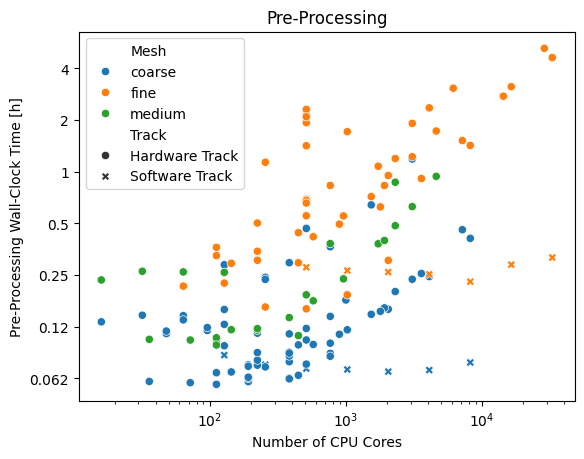

In [10]:
df = df_pre
ax = sb.scatterplot(df.sort_values("Mesh"),x="Number of CPU Cores", y="Pre-Processing Wall-Clock Time [h]", hue="Mesh", style="Track")
ax.set(xscale="log", yscale="log", title="Pre-Processing")
ax.set_yscale("log", base=2)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
sb.move_legend(ax, "upper left")#, bbox_to_anchor=(1, 1))
fig = ax.get_figure()
op.save_fig(fig, fig_folder, "wct_cores_preprocessing", doSaveFig)

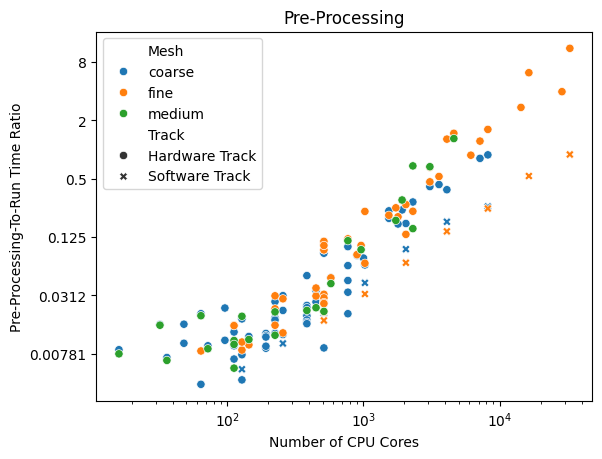

In [11]:
df = df_pre
df["Pre-Processing-To-Run Time Ratio"] = df["Pre-Processing Wall-Clock Time [h]"] / df["Time-To-Solution [h]"]
ax = sb.scatterplot(df.sort_values("Mesh"),x="Number of CPU Cores", y="Pre-Processing-To-Run Time Ratio", hue="Mesh", style="Track")
ax.set(xscale="log", title="Pre-Processing")
ax.set_yscale("log", base=2)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3g'))
sb.move_legend(ax, "upper left")
fig = ax.get_figure()
op.save_fig(fig, fig_folder, "run-to-preprocessing-time-ratio_cores", doSaveFig)

# Pre-Processing Collated vs. Coherent I/O Format

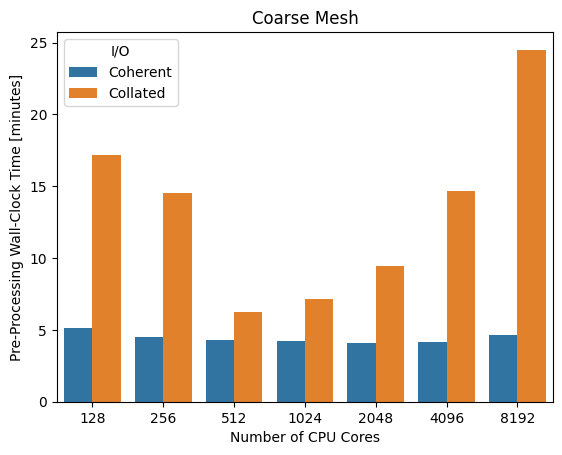

In [12]:
# Data submitted by Wikki GmbH includes a comparison of collated and coherent
# formats on the same hardware
df = df_pre[df_pre["Contributor ID"] == "01"]
df = df[df["Mesh"] == "coarse"]
df = df[df["CPU Family"] == "AMD"]
df.loc[df["Track"] == "Software Track", "Track"] = "Coherent"
df.loc[df["Track"] == "Hardware Track", "Track"] = "Collated"
df["Pre-Processing Wall-Clock Time [minutes]"] = df["Pre-Processing Wall-Clock Time [h]"] * 60
ax = sb.barplot(df.sort_values("Pre-Processing Wall-Clock Time [minutes]"),x="Number of CPU Cores", y="Pre-Processing Wall-Clock Time [minutes]", hue="Track")
ax.set(title="Coarse Mesh")
ax.legend(title="I/O")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3g'))
sb.move_legend(ax, "upper left")
fig = ax.get_figure()
op.save_fig(fig, fig_folder, "WCT_cores_collated-coherent_coarse", doSaveFig)

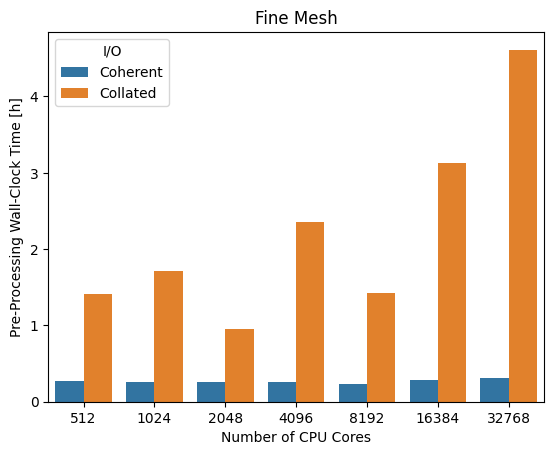

In [13]:
df = df_pre[df_pre["Contributor ID"] == "01"]
df = df[df["Mesh"] == "fine"]
df = df[df["CPU Family"] == "AMD"]
df = df[df["Number of CPU Cores"] > 256]
df.loc[df["Track"] == "Software Track", "Track"] = "Coherent"
df.loc[df["Track"] == "Hardware Track", "Track"] = "Collated"
ax = sb.barplot(df.sort_values("Pre-Processing Wall-Clock Time [h]"),x="Number of CPU Cores", y="Pre-Processing Wall-Clock Time [h]", hue="Track")
ax.set(title="Fine Mesh")
ax.legend(title="I/O")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3g'))
sb.move_legend(ax, "upper left")
fig = ax.get_figure()
op.save_fig(fig, fig_folder, "WCT_cores_collated-coherent_fine", doSaveFig)

# Solver Run

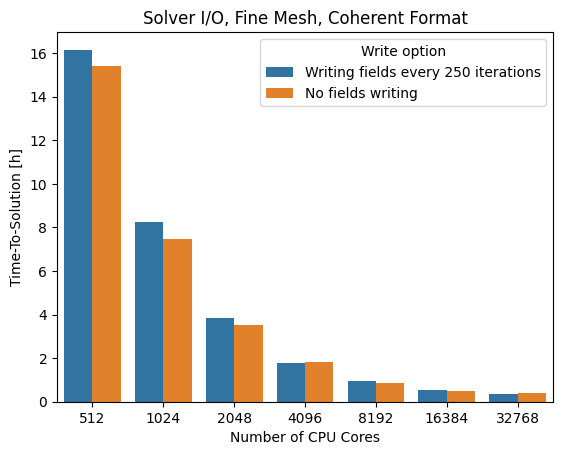

In [14]:
df = df_pre[df_pre["Contributor ID"] == "01"]
df = df[df["Mesh"] == "fine"]
df = df[df["CPU Family"] == "AMD"]
df = df[df["Number of CPU Cores"] > 256]
df.loc[df["Track"] == "Software Track", "Track"] = "Writing fields every 250 iterations"
df.loc[df["Track"] == "Hardware Track", "Track"] = "No fields writing"
ax = sb.barplot(df.sort_values("Pre-Processing Wall-Clock Time [h]"),x="Number of CPU Cores", y="Time-To-Solution [h]", hue="Track")
ax.set(title="Solver I/O, Fine Mesh, Coherent Format")
# ax.set_yscale("log", base=2)
ax.legend(title="Write option")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3g'))
sb.move_legend(ax, "upper right")
fig = ax.get_figure()
op.save_fig(fig, fig_folder, "WCT_cores_run_collated-coherent_fine", doSaveFig)